In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = np.arange(0,5,0.0001, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y
print (len(X))

50000


Text(0, 0.5, 'Y')

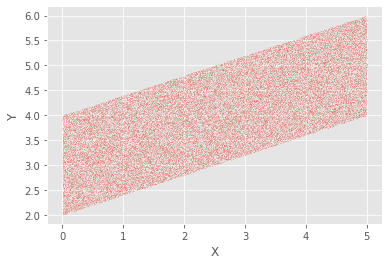

In [3]:
plt.scatter(X,Y,s=0.01)
plt.xlabel('X')
plt.ylabel('Y')

$$
h(X, \theta) = X^T . \theta
$$

In [4]:
def hyp(theta, X):
    # Find the hypothesis when you receive 2 a matrix X and a vector theta, return the result as mentioned in the equation above.
    return theta.dot(X.T)

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [5]:
def cost_function(theta,X,Y):
    # Find the cost function by using the above given equations 
    inner = np.power((X.dot(theta.T) - Y), 2)
    return np.sum(inner) / (2 * len(X))

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [6]:
def derivative_cost_function(theta,X,Y,alpha):
    m = len(Y)
    prediction = np.dot(X,theta)
    theta = theta -(1/m)*alpha*( X.T.dot((prediction - Y)))
    return theta

In [7]:
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50000,)
(50000, 2)


In [8]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [9]:
cf=cost_function(thetas,nx,Y)
print (cf)

1.5324172602347712


In [10]:
ad=derivative_cost_function(thetas,nx,Y,0.01)
print (ad)

[0.62500536 0.91401841]


In [11]:
def GradientDescent(X,Y,theta,maxniter=2000):
    """
    Write the gradient descent method in following order
    Find cost using the above function that you will build
    Find the new derivatives.
    If the cost is decreasing, continue the work, else break it
    """
    learning_rate = 0.01
    m = len(Y)
    cost_history = np.zeros(maxniter)
    theta_history = np.zeros((maxniter,2))
    for i in range(maxniter):
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - Y)))
        theta_history[i,:] =theta.T
        cost_history[i]  = cost_function(theta,X,Y)
        print ("Iteration: " + str(i) + " with theeta: " + str(theta) + " has cost : " + str(cost_history[i]))
    return theta


In [12]:
# NO need to pass other arguments we can directly call them in GradientDecent
theta_new = GradientDescent(nx,Y,thetas)
print(theta_new)

Iteration: 0 with theeta: [0.62500536 0.91401841] has cost : 1.3771610468087727
Iteration: 1 with theeta: [0.65839952 0.9292382 ] has cost : 1.2485126798477737
Iteration: 2 with theeta: [0.68863043 0.94347096] has cost : 1.1418495288050377
Iteration: 3 with theeta: [0.71598636 0.95680563] has cost : 1.0533523513884155
Iteration: 4 with theeta: [0.74072934 0.96932306] has cost : 0.9798656676886554
Iteration: 5 with theeta: [0.76309753 0.98109677] has cost : 0.9187824007676767
Iteration: 6 with theeta: [0.78330743 0.99219354] has cost : 0.8679485662858085
Iteration: 7 with theeta: [0.80155581 1.0026741 ] has cost : 0.8255845267191805
Iteration: 8 with theeta: [0.81802153 1.01259366] has cost : 0.7902199313027398
Iteration: 9 with theeta: [0.83286716 1.0220024 ] has cost : 0.7606399631704078
Iteration: 10 with theeta: [0.84624048 1.0309459 ] has cost : 0.7358409285433273
Iteration: 11 with theeta: [0.8582758  1.03946565] has cost : 0.7149935643527885
Iteration: 12 with theeta: [0.86909522

Iteration: 132 with theeta: [0.84902507 1.54403797] has cost : 0.4305839135893117
Iteration: 133 with theeta: [0.84800131 1.54735719] has cost : 0.4293787670233873
Iteration: 134 with theeta: [0.84697988 1.5506688 ] has cost : 0.42817912964000576
Iteration: 135 with theeta: [0.84596078 1.55397284] has cost : 0.42698497625456094
Iteration: 136 with theeta: [0.844944   1.55726931] has cost : 0.4257962817975823
Iteration: 137 with theeta: [0.84392954 1.56055823] has cost : 0.424613021314207
Iteration: 138 with theeta: [0.8429174  1.56383963] has cost : 0.4234351699636559
Iteration: 139 with theeta: [0.84190756 1.56711352] has cost : 0.42226270301871033
Iteration: 140 with theeta: [0.84090003 1.57037991] has cost : 0.42109559586519296
Iteration: 141 with theeta: [0.8398948  1.57363883] has cost : 0.4199338240014493
Iteration: 142 with theeta: [0.83889186 1.57689028] has cost : 0.41877736303783414
Iteration: 143 with theeta: [0.83789122 1.5801343 ] has cost : 0.4176261886961984
Iteration: 1

Iteration: 265 with theeta: [0.73150599 1.92501189] has cost : 0.3102859001536804
Iteration: 266 with theeta: [0.73075103 1.92745928] has cost : 0.3096306814610575
Iteration: 267 with theeta: [0.7299978  1.92990108] has cost : 0.30897845802173074
Iteration: 268 with theeta: [0.7292463  1.93233728] has cost : 0.3083292161432606
Iteration: 269 with theeta: [0.72849651 1.93476791] has cost : 0.30768294219580117
Iteration: 270 with theeta: [0.72774844 1.93719298] has cost : 0.307039622611813
Iteration: 271 with theeta: [0.72700208 1.9396125 ] has cost : 0.30639924388577994
Iteration: 272 with theeta: [0.72625743 1.94202648] has cost : 0.30576179257392394
Iteration: 273 with theeta: [0.72551449 1.94443494] has cost : 0.30512725529392415
Iteration: 274 with theeta: [0.72477324 1.94683789] has cost : 0.3044956187246349
Iteration: 275 with theeta: [0.72403369 1.94923534] has cost : 0.3038668696058067
Iteration: 276 with theeta: [0.72329583 1.9516273 ] has cost : 0.3032409947378078
Iteration: 2

Iteration: 402 with theeta: [0.6426334 2.213116 ] has cost : 0.24346663006153427
Iteration: 403 with theeta: [0.64208181 2.21490412] has cost : 0.24311686761007797
Iteration: 404 with theeta: [0.64153149 2.21668815] has cost : 0.2427687040555204
Iteration: 405 with theeta: [0.64098242 2.2184681 ] has cost : 0.24242213208869695
Iteration: 406 with theeta: [0.64043461 2.22024398] has cost : 0.24207714443385617
Iteration: 407 with theeta: [0.63988805 2.22201579] has cost : 0.24173373384850674
Iteration: 408 with theeta: [0.63934274 2.22378355] has cost : 0.24139189312326553
Iteration: 409 with theeta: [0.63879869 2.22554726] has cost : 0.2410516150817063
Iteration: 410 with theeta: [0.63825587 2.22730693] has cost : 0.24071289258020875
Iteration: 411 with theeta: [0.6377143  2.22906258] has cost : 0.24037571850780903
Iteration: 412 with theeta: [0.63717397 2.23081421] has cost : 0.2400400857860501
Iteration: 413 with theeta: [0.63663487 2.23256184] has cost : 0.23970598736883333
Iteration

Iteration: 525 with theeta: [0.5834411  2.40500357] has cost : 0.21050356039033707
Iteration: 526 with theeta: [0.58302497 2.40635259] has cost : 0.2103044846396662
Iteration: 527 with theeta: [0.58260978 2.40769853] has cost : 0.2101063189397999
Iteration: 528 with theeta: [0.58219554 2.40904139] has cost : 0.20990905913055052
Iteration: 529 with theeta: [0.58178225 2.41038117] has cost : 0.20971270107074838
Iteration: 530 with theeta: [0.58136991 2.41171789] has cost : 0.2095172406381545
Iteration: 531 with theeta: [0.58095851 2.41305155] has cost : 0.2093226737293742
Iteration: 532 with theeta: [0.58054805 2.41438216] has cost : 0.20912899625977113
Iteration: 533 with theeta: [0.58013854 2.41570972] has cost : 0.20893620416338124
Iteration: 534 with theeta: [0.57972995 2.41703425] has cost : 0.2087442933928276
Iteration: 535 with theeta: [0.57932231 2.41835574] has cost : 0.2085532599192353
Iteration: 536 with theeta: [0.57891559 2.41967421] has cost : 0.20836309973214692
Iteration:

Iteration: 657 with theeta: [0.53598446 2.5588469 ] has cost : 0.1907405034681655
Iteration: 658 with theeta: [0.53567692 2.55984388] has cost : 0.19063177215066615
Iteration: 659 with theeta: [0.53537008 2.56083858] has cost : 0.19052353788528206
Iteration: 660 with theeta: [0.53506394 2.56183101] has cost : 0.1904157983997994
Iteration: 661 with theeta: [0.5347585  2.56282116] has cost : 0.1903085514323915
Iteration: 662 with theeta: [0.53445376 2.56380905] has cost : 0.19020179473157128
Iteration: 663 with theeta: [0.53414972 2.56479468] has cost : 0.19009552605614408
Iteration: 664 with theeta: [0.53384638 2.56577805] has cost : 0.18998974317516076
Iteration: 665 with theeta: [0.53354373 2.56675918] has cost : 0.18988444386787046
Iteration: 666 with theeta: [0.53324177 2.56773805] has cost : 0.1897796259236744
Iteration: 667 with theeta: [0.5329405  2.56871469] has cost : 0.18967528714207899
Iteration: 668 with theeta: [0.53263992 2.56968909] has cost : 0.1895714253326504
Iteration

Iteration: 780 with theeta: [0.50298127 2.66583551] has cost : 0.1804932114010797
Iteration: 781 with theeta: [0.50274925 2.66658767] has cost : 0.18043132434441456
Iteration: 782 with theeta: [0.50251775 2.66733811] has cost : 0.18036972019697126
Iteration: 783 with theeta: [0.50228679 2.66808683] has cost : 0.1803083976654644
Iteration: 784 with theeta: [0.50205636 2.66883384] has cost : 0.1802473554625206
Iteration: 785 with theeta: [0.50182646 2.66957914] has cost : 0.18018659230665174
Iteration: 786 with theeta: [0.50159708 2.67032274] has cost : 0.18012610692222758
Iteration: 787 with theeta: [0.50136822 2.67106463] has cost : 0.18006589803944953
Iteration: 788 with theeta: [0.50113989 2.67180482] has cost : 0.18000596439432368
Iteration: 789 with theeta: [0.50091208 2.67254332] has cost : 0.17994630472863415
Iteration: 790 with theeta: [0.5006848  2.67328013] has cost : 0.17988691778991708
Iteration: 791 with theeta: [0.50045803 2.67401526] has cost : 0.17982780233143392
Iterati

Iteration: 900 with theeta: [0.47861001 2.74484142] has cost : 0.1747673646130872
Iteration: 901 with theeta: [0.47843376 2.74541279] has cost : 0.17473165257501988
Iteration: 902 with theeta: [0.47825791 2.74598285] has cost : 0.1746961037902311
Iteration: 903 with theeta: [0.47808246 2.74655161] has cost : 0.17466071751242818
Iteration: 904 with theeta: [0.47790742 2.74711907] has cost : 0.17462549299873
Iteration: 905 with theeta: [0.47773277 2.74768523] has cost : 0.17459042950965148
Iteration: 906 with theeta: [0.47755853 2.74825009] has cost : 0.17455552630908794
Iteration: 907 with theeta: [0.47738468 2.74881366] has cost : 0.17452078266429985
Iteration: 908 with theeta: [0.47721123 2.74937594] has cost : 0.174486197845897
Iteration: 909 with theeta: [0.47703818 2.74993693] has cost : 0.17445177112782392
Iteration: 910 with theeta: [0.47686552 2.75049664] has cost : 0.17441750178734386
Iteration: 911 with theeta: [0.47669326 2.75105507] has cost : 0.1743833891050242
Iteration: 9

Iteration: 1019 with theeta: [0.46023084 2.80442237] has cost : 0.1714839566944399
Iteration: 1020 with theeta: [0.46009665 2.8048574 ] has cost : 0.17146325436000545
Iteration: 1021 with theeta: [0.45996276 2.80529144] has cost : 0.1714426466637981
Iteration: 1022 with theeta: [0.45982918 2.80572448] has cost : 0.17142213317319063
Iteration: 1023 with theeta: [0.4596959  2.80615653] has cost : 0.17140171345753352
Iteration: 1024 with theeta: [0.45956293 2.8065876 ] has cost : 0.1713813870881459
Iteration: 1025 with theeta: [0.45943026 2.80701767] has cost : 0.17136115363830642
Iteration: 1026 with theeta: [0.4592979  2.80744676] has cost : 0.1713410126832447
Iteration: 1027 with theeta: [0.45916584 2.80787488] has cost : 0.17132096380013195
Iteration: 1028 with theeta: [0.45903408 2.80830201] has cost : 0.17130100656807234
Iteration: 1029 with theeta: [0.45890262 2.80872816] has cost : 0.17128114056809415
Iteration: 1030 with theeta: [0.45877146 2.80915334] has cost : 0.17126136538314

Iteration: 1143 with theeta: [0.44572875 2.85143477] has cost : 0.1695210992686954
Iteration: 1144 with theeta: [0.44562774 2.85176223] has cost : 0.1695093699004485
Iteration: 1145 with theeta: [0.44552696 2.85208893] has cost : 0.16949769415159513
Iteration: 1146 with theeta: [0.44542641 2.85241488] has cost : 0.16948607177702055
Iteration: 1147 with theeta: [0.44532609 2.85274009] has cost : 0.1694745025327309
Iteration: 1148 with theeta: [0.445226   2.85306456] has cost : 0.1694629861758473
Iteration: 1149 with theeta: [0.44512614 2.85338828] has cost : 0.1694515224646015
Iteration: 1150 with theeta: [0.44502651 2.85371126] has cost : 0.1694401111583301
Iteration: 1151 with theeta: [0.44492711 2.85403351] has cost : 0.1694287520174702
Iteration: 1152 with theeta: [0.44482793 2.85435501] has cost : 0.169417444803554
Iteration: 1153 with theeta: [0.44472898 2.85467578] has cost : 0.16940618927920365
Iteration: 1154 with theeta: [0.44463026 2.85499582] has cost : 0.16939498520812646
I

Iteration: 1250 with theeta: [0.43613242 2.88254382] has cost : 0.1685267585369067
Iteration: 1251 with theeta: [0.43605337 2.88280008] has cost : 0.16851957467749212
Iteration: 1252 with theeta: [0.4359745  2.88305576] has cost : 0.16851242365822508
Iteration: 1253 with theeta: [0.43589581 2.88331085] has cost : 0.16850530532898098
Iteration: 1254 with theeta: [0.4358173  2.88356536] has cost : 0.16849821954032115
Iteration: 1255 with theeta: [0.43573897 2.88381929] has cost : 0.16849116614349038
Iteration: 1256 with theeta: [0.43566082 2.88407264] has cost : 0.1684841449904132
Iteration: 1257 with theeta: [0.43558285 2.8843254 ] has cost : 0.1684771559336912
Iteration: 1258 with theeta: [0.43550505 2.88457759] has cost : 0.16847019882659983
Iteration: 1259 with theeta: [0.43542744 2.8848292 ] has cost : 0.16846327352308516
Iteration: 1260 with theeta: [0.43535    2.88508024] has cost : 0.1684563798777609
Iteration: 1261 with theeta: [0.43527274 2.8853307 ] has cost : 0.16844951774590

Iteration: 1378 with theeta: [0.42735243 2.91100649] has cost : 0.16782946344472616
Iteration: 1379 with theeta: [0.42729347 2.91119762] has cost : 0.16782546718579786
Iteration: 1380 with theeta: [0.42723465 2.91138832] has cost : 0.1678214891952857
Iteration: 1381 with theeta: [0.42717595 2.91157858] has cost : 0.1678175293896778
Iteration: 1382 with theeta: [0.4271174 2.9117684] has cost : 0.167813587685844
Iteration: 1383 with theeta: [0.42705898 2.91195779] has cost : 0.16780966400103436
Iteration: 1384 with theeta: [0.42700069 2.91214675] has cost : 0.16780575825287694
Iteration: 1385 with theeta: [0.42694253 2.91233528] has cost : 0.16780187035937658
Iteration: 1386 with theeta: [0.42688451 2.91252337] has cost : 0.16779800023891286
Iteration: 1387 with theeta: [0.42682662 2.91271103] has cost : 0.16779414781023846
Iteration: 1388 with theeta: [0.42676887 2.91289826] has cost : 0.1677903129924775
Iteration: 1389 with theeta: [0.42671124 2.91308507] has cost : 0.16778649570512388

Iteration: 1500 with theeta: [0.4210699  2.93137297] has cost : 0.16745512437777932
Iteration: 1501 with theeta: [0.42102532 2.9315175 ] has cost : 0.1674528393647858
Iteration: 1502 with theeta: [0.42098084 2.9316617 ] has cost : 0.16745056479745385
Iteration: 1503 with theeta: [0.42093646 2.93180557] has cost : 0.16744830062803234
Iteration: 1504 with theeta: [0.42089218 2.9319491 ] has cost : 0.16744604680898853
Iteration: 1505 with theeta: [0.420848   2.93209232] has cost : 0.1674438032930069
Iteration: 1506 with theeta: [0.42080393 2.9322352 ] has cost : 0.16744157003298812
Iteration: 1507 with theeta: [0.42075995 2.93237775] has cost : 0.16743934698204854
Iteration: 1508 with theeta: [0.42071608 2.93251998] has cost : 0.16743713409351837
Iteration: 1509 with theeta: [0.42067231 2.93266189] has cost : 0.16743493132094142
Iteration: 1510 with theeta: [0.42062863 2.93280347] has cost : 0.16743273861807395
Iteration: 1511 with theeta: [0.42058506 2.93294472] has cost : 0.167430555938

Iteration: 1616 with theeta: [0.41652317 2.94611241] has cost : 0.16724904801265122
Iteration: 1617 with theeta: [0.41648899 2.94622321] has cost : 0.16724770505292763
Iteration: 1618 with theeta: [0.41645489 2.94633376] has cost : 0.1672463682323826
Iteration: 1619 with theeta: [0.41642087 2.94644405] has cost : 0.16724503752295164
Iteration: 1620 with theeta: [0.41638692 2.9465541 ] has cost : 0.16724371289669843
Iteration: 1621 with theeta: [0.41635305 2.94666389] has cost : 0.16724239432581456
Iteration: 1622 with theeta: [0.41631927 2.94677342] has cost : 0.16724108178261857
Iteration: 1623 with theeta: [0.41628555 2.94688271] has cost : 0.1672397752395557
Iteration: 1624 with theeta: [0.41625192 2.94699175] has cost : 0.16723847466919692
Iteration: 1625 with theeta: [0.41621836 2.94710054] has cost : 0.16723718004423882
Iteration: 1626 with theeta: [0.41618488 2.94720908] has cost : 0.16723589133750266
Iteration: 1627 with theeta: [0.41615147 2.94731737] has cost : 0.167234608521

Iteration: 1737 with theeta: [0.41290708 2.95783492] has cost : 0.16712402119985342
Iteration: 1738 with theeta: [0.41288118 2.9579189 ] has cost : 0.16712324978513818
Iteration: 1739 with theeta: [0.41285533 2.95800268] has cost : 0.16712248189685242
Iteration: 1740 with theeta: [0.41282955 2.95808628] has cost : 0.16712171751887533
Iteration: 1741 with theeta: [0.41280382 2.95816968] has cost : 0.16712095663516008
Iteration: 1742 with theeta: [0.41277815 2.95825289] has cost : 0.1671201992297331
Iteration: 1743 with theeta: [0.41275254 2.95833591] has cost : 0.16711944528669373
Iteration: 1744 with theeta: [0.41272699 2.95841873] has cost : 0.16711869479021413
Iteration: 1745 with theeta: [0.4127015  2.95850137] has cost : 0.16711794772453867
Iteration: 1746 with theeta: [0.41267607 2.95858383] has cost : 0.16711720407398403
Iteration: 1747 with theeta: [0.41265069 2.95866609] has cost : 0.1671164638229382
Iteration: 1748 with theeta: [0.41262537 2.95874816] has cost : 0.167115726955

Iteration: 1858 with theeta: [0.41016645 2.96671943] has cost : 0.1670522040623052
Iteration: 1859 with theeta: [0.41014681 2.96678307] has cost : 0.16705176095097998
Iteration: 1860 with theeta: [0.41012722 2.96684657] has cost : 0.16705131986528474
Iteration: 1861 with theeta: [0.41010768 2.96690993] has cost : 0.16705088079595964
Iteration: 1862 with theeta: [0.41008818 2.96697314] has cost : 0.16705044373378708
Iteration: 1863 with theeta: [0.41006873 2.9670362 ] has cost : 0.16705000866959152
Iteration: 1864 with theeta: [0.41004932 2.96709912] has cost : 0.16704957559423947
Iteration: 1865 with theeta: [0.41002995 2.9671619 ] has cost : 0.16704914449863928
Iteration: 1866 with theeta: [0.41001063 2.96722453] has cost : 0.16704871537374066
Iteration: 1867 with theeta: [0.40999136 2.96728702] has cost : 0.1670482882105348
Iteration: 1868 with theeta: [0.40997213 2.96734937] has cost : 0.16704786300005406
Iteration: 1869 with theeta: [0.40995294 2.96741157] has cost : 0.167047439733

Iteration: 1980 with theeta: [0.40807443 2.97350124] has cost : 0.16701069677185704
Iteration: 1981 with theeta: [0.40805959 2.97354936] has cost : 0.16701044340610824
Iteration: 1982 with theeta: [0.40804478 2.97359738] has cost : 0.16701019119859042
Iteration: 1983 with theeta: [0.40803    2.97364529] has cost : 0.16700994014400894
Iteration: 1984 with theeta: [0.40801525 2.97369308] has cost : 0.16700969023709314
Iteration: 1985 with theeta: [0.40800054 2.97374077] has cost : 0.16700944147259678
Iteration: 1986 with theeta: [0.40798587 2.97378835] has cost : 0.16700919384529722
Iteration: 1987 with theeta: [0.40797122 2.97383582] has cost : 0.16700894734999613
Iteration: 1988 with theeta: [0.40795661 2.97388318] has cost : 0.16700870198151857
Iteration: 1989 with theeta: [0.40794204 2.97393043] has cost : 0.1670084577347134
Iteration: 1990 with theeta: [0.4079275  2.97397758] has cost : 0.16700821460445314
Iteration: 1991 with theeta: [0.40791299 2.97402461] has cost : 0.16700797258

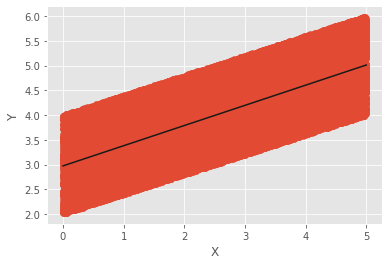

In [13]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new),c='0.1')